# Convolutional Neural Network CNN

## O que é?

Redes neurais convulucionais são amplamente utilizadas em reconhecimento de imagens, pois através de diversos filtros conseguem identificar padrões nas imagens. Contudo CNNs também podem ser usadas em séries temporais.

CNN em séries temporais:
As CNNs funcionam através de filtros, os filtros (de tamanho selecionáveis) percorrem os dados, aplicando uma espécie de produto escalar em cada ponto e obtdendo um "mapa auxiliar" que também passa por novos filtros. Após cada passagem pode ser aplicado o processo de "polimento", onde um novo filtro (m x n) passa pelo mapa gerado e como resultado apresenta a média ou o maior valor dos pontos em que passou.

### Exemplo 

In [140]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D, Flatten, Dense, Dropout
from sklearn.datasets import make_regression

##### Apenas uma variável independente

In [14]:
#Gera regressão com valores aleatórios, 500 linhas e 1 colunas além da variável alvo
X, y = make_regression(n_samples = 500, n_features = 1, shuffle = False, random_state = 0)

X = X.reshape(X.shape[0], X.shape[1], 1)

limit = int(len(X) * 0.75)

X_train, X_test = X[:limit], X[limit:]
y_train, y_test = y[:limit], y[limit:]

In [15]:
#Criando modelo convolucional

model = Sequential()
model.add(Conv1D(filters = 64, kernel_size = 1, input_shape = (1,1))) 
model.add(Flatten())
model.add(Dense(16))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')


In [16]:
model.fit(X_train, y_train, epochs=20, verbose = False)

In [17]:
yhat = model.predict(X_test)
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 9ms/step - loss: 0.1111


0.1110699251294136

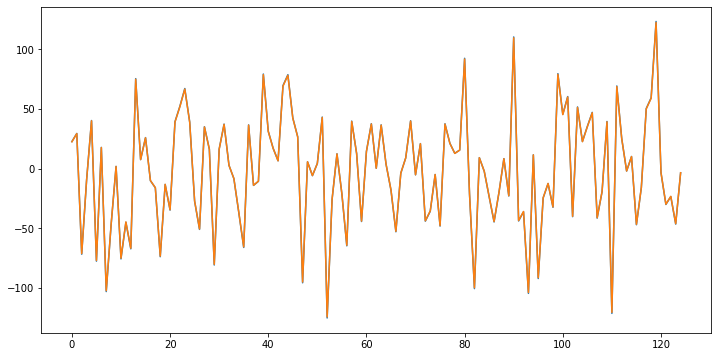

In [18]:
plt.figure(figsize=(12,6))
plt.plot(y_test)
plt.plot(yhat)

##### Conjunto de variáveis independentes

In [19]:
#Gera regressão com valores aleatórios, 1000 linhas e 5 colunas além da variável alvo
X, y = make_regression(n_samples = 1000, n_features = 5, shuffle = False, random_state = 0)

X = X.reshape(X.shape[0], X.shape[1], 1)

limit = int(len(X) * 0.75)

X_train, X_test = X[:limit], X[limit:]
y_train, y_test = y[:limit], y[limit:]

In [20]:
#Criando modelo convolucional

model = Sequential()
model.add(Conv1D(filters = 64, kernel_size = 1, input_shape = (5,1))) 
model.add(Flatten())
model.add(Dense(16))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [21]:
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
24/24 [==============================] - 0s 3ms/step - loss: 9309.5938
Epoch 2/20
24/24 [==============================] - 0s 3ms/step - loss: 8838.1475
Epoch 3/20
24/24 [==============================] - 0s 2ms/step - loss: 8075.2788
Epoch 4/20
24/24 [==============================] - 0s 2ms/step - loss: 6931.3525
Epoch 5/20
24/24 [==============================] - 0s 2ms/step - loss: 5412.5737
Epoch 6/20
24/24 [==============================] - 0s 3ms/step - loss: 3717.3625
Epoch 7/20
24/24 [==============================] - 0s 2ms/step - loss: 2166.1604
Epoch 8/20
24/24 [==============================] - 0s 3ms/step - loss: 1073.9224
Epoch 9/20
24/24 [==============================] - 0s 3ms/step - loss: 442.4658
Epoch 10/20
24/24 [==============================] - 0s 4ms/step - loss: 161.2776
Epoch 11/20
24/24 [==============================] - 0s 2ms/step - loss: 49.4032
Epoch 12/20
24/24 [==============================] - 0s 2ms/step - loss: 12.5214
Epoch 13/20
24/24 [

In [22]:
yhat = model.predict(X_test)
model.evaluate(X_test, y_test)

8/8 [==============================] - 0s 2ms/step - loss: 1.8383e-04


0.0001838299067458138

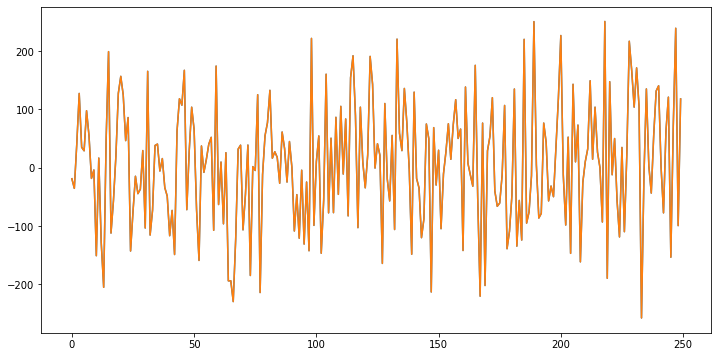

In [23]:
plt.figure(figsize=(12,6))
plt.plot(y_test)
plt.plot(yhat)

In [24]:
type(X_train)

numpy.ndarray

#### Utilizando dados do facebook

In [165]:
# Carregando Dataset
import pandas_datareader.data as web
import datetime as dt

end = dt.datetime(2020, 11, 1)
start = dt.datetime(2015, 1, 1)

df = web.DataReader("FB", 'yahoo', start, end)

df = df.reset_index()
df = df.drop(columns=['Open','Date','High','Low','Volume','Adj Close'])
df = df.rename(columns={'Close': 'Close 0'})
df.head()

,Close 0
0,78.449997
1,77.190002
2,76.150002
3,76.150002
4,78.180000


In [166]:
def window (df, w):
    for i in range(1,w):
        df['Close '+str(i)] = df['Close '+str(i-1)].shift(1)
    return df
        
new_df = window(df,5)
new_df = new_df.rename(columns={'Close 0': 'Target'})
new_df.dropna(inplace=True)
new_df.head()

,Target,Close 1,Close 2,Close 3,Close 4
4,78.180000,76.150002,76.150002,77.190002,78.449997
5,77.739998,78.180000,76.150002,76.150002,77.190002
6,76.720001,77.739998,78.180000,76.150002,76.150002
7,76.449997,76.720001,77.739998,78.180000,76.150002
8,76.279999,76.449997,76.720001,77.739998,78.180000


In [167]:
limit = int(len(new_df)*0.75)

X = new_df.loc[:,['Close 1','Close 2','Close 3','Close 4']]
y = new_df.loc[:,'Target'].tolist()

X = np.array(X)
X = X.reshape(X.shape[0], X.shape[1], 1)

y = np.array(y)

X_train, X_test = X[:limit], X[limit:]
y_train, y_test = y[:limit], y[limit:]

In [168]:
# construindo rede neural convolucional

model = Sequential()

model.add(Conv1D(64, 1, input_shape=(X.shape[1],1)))

#model.add(MaxPooling1D(1,3))

model.add(Conv1D(32, kernel_size=1, activation='relu'))

model.add(Flatten())

model.add(Dense(50))

model.add(Dense(30))

model.add(Dense(15))

model.add(Dense(1))

model.compile(optimizer='adam', loss = 'mse', metrics=['mean_squared_error'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
35/35 [==============================] - 0s 7ms/step - loss: 1784.0017 - mean_squared_error: 1784.0017
Epoch 2/100
35/35 [==============================] - 0s 3ms/step - loss: 36.3532 - mean_squared_error: 36.3532
Epoch 3/100
35/35 [==============================] - 0s 3ms/step - loss: 12.0857 - mean_squared_error: 12.0857
Epoch 4/100
35/35 [==============================] - 0s 3ms/step - loss: 11.1764 - mean_squared_error: 11.1764
Epoch 5/100
35/35 [==============================] - ETA: 0s - loss: 11.1897 - mean_squared_error: 11.18 - 0s 3ms/step - loss: 11.2063 - mean_squared_error: 11.2063
Epoch 6/100
35/35 [==============================] - 0s 4ms/step - loss: 11.2140 - mean_squared_error: 11.2140
Epoch 7/100
35/35 [==============================] - 0s 3ms/step - loss: 11.1386 - mean_squared_error: 11.1386
Epoch 8/100
35/35 [==============================] - 0s 3ms/step - loss: 11.1341 - mean_squared_error: 11.1341
Epoch 9/100
35/35 [==============================] - 0

35/35 [==============================] - 0s 2ms/step - loss: 9.0663 - mean_squared_error: 9.0663
Epoch 74/100
35/35 [==============================] - 0s 3ms/step - loss: 14.0143 - mean_squared_error: 14.0143
Epoch 75/100
35/35 [==============================] - 0s 3ms/step - loss: 11.2462 - mean_squared_error: 11.2462
Epoch 76/100
35/35 [==============================] - 0s 3ms/step - loss: 13.6970 - mean_squared_error: 13.6970
Epoch 77/100
35/35 [==============================] - 0s 3ms/step - loss: 9.9876 - mean_squared_error: 9.9876
Epoch 78/100
35/35 [==============================] - 0s 4ms/step - loss: 8.6627 - mean_squared_error: 8.6627
Epoch 79/100
35/35 [==============================] - 0s 3ms/step - loss: 9.6744 - mean_squared_error: 9.6744
Epoch 80/100
35/35 [==============================] - 0s 4ms/step - loss: 9.9756 - mean_squared_error: 9.9756
Epoch 81/100
35/35 [==============================] - 0s 4ms/step - loss: 9.7059 - mean_squared_error: 9.7059
Epoch 82/100
35/3

In [169]:
yhat = model.predict(X_test)
model.evaluate(X_test, y_test)

12/12 [==============================] - 0s 4ms/step - loss: 45.1819 - mean_squared_error: 45.1819


[45.18191146850586, 45.18191146850586]

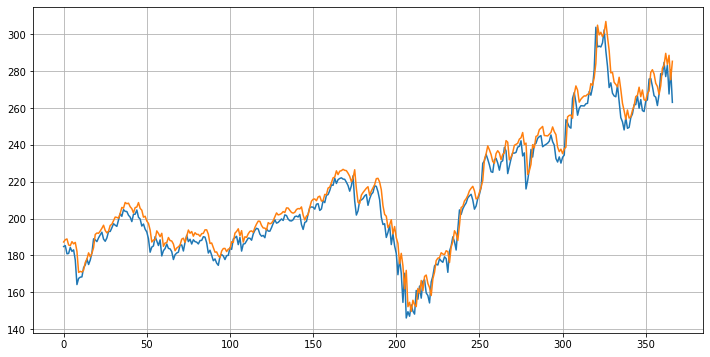

In [170]:
plt.figure(figsize=(12,6))
plt.plot(y_test)
plt.plot(yhat)
plt.grid()

### usando dados do dia anterior

In [171]:
# Carregando Dataset
import pandas_datareader.data as web
import datetime as dt

end = dt.datetime(2020, 11, 1)
start = dt.datetime(2015, 1, 1)

df = web.DataReader("FB", 'yahoo', start, end)

df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-01-02,78.930000,77.699997,78.580002,78.449997,18177500,78.449997
1,2015-01-05,79.250000,76.860001,77.980003,77.190002,26452200,77.190002
2,2015-01-06,77.589996,75.360001,77.230003,76.150002,27399300,76.150002
3,2015-01-07,77.360001,75.820000,76.760002,76.150002,22045300,76.150002
4,2015-01-08,78.230003,76.080002,76.739998,78.180000,23961000,78.180000


In [172]:
#Excluindo algumas colunas
df = df.drop(columns = ['Date', 'Volume', 'Adj Close'])

df.head()

,High,Low,Open,Close
0,78.930000,77.699997,78.580002,78.449997
1,79.250000,76.860001,77.980003,77.190002
2,77.589996,75.360001,77.230003,76.150002
3,77.360001,75.820000,76.760002,76.150002
4,78.230003,76.080002,76.739998,78.180000


In [178]:
# Utilizando colunas High, low, open, close do dia D para prever close do dia D+1
df['Target'] = df.Close.shift(-1)
df.head()

,High,Low,Open,Close,Target
0,78.930000,77.699997,78.580002,78.449997,77.190002
1,79.250000,76.860001,77.980003,77.190002,76.150002
2,77.589996,75.360001,77.230003,76.150002,76.150002
3,77.360001,75.820000,76.760002,76.150002,78.180000
4,78.230003,76.080002,76.739998,78.180000,77.739998


In [186]:
limit = int(len(df)*0.75)

X = df.loc[:, ['High','Low','Open','Close']]
y = df.loc[:,'Target'].tolist()

X, y = np.array(X), np.array(y)

X = X.reshape(X.shape[0], X.shape[1], 1)

X_train, X_test = X[:limit], X[limit:]
y_train, y_test = y[:limit], y[limit:]

In [204]:
#Criando modelo
model = Sequential()

model.add(Conv1D(256, kernel_size=1, input_shape = (X.shape[1], 1), activation='relu'))
model.add(Conv1D(64, 1, activation='relu'))

model.add(Flatten())

model.add(Dense(50))
model.add(Dense(10))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

model.fit(X_train, y_train, epochs=50)

Epoch 1/50
35/35 [==============================] - 0s 10ms/step - loss: 5780.0195
Epoch 2/50
35/35 [==============================] - 0s 4ms/step - loss: 99.5151
Epoch 3/50
35/35 [==============================] - 0s 4ms/step - loss: 9.9541
Epoch 4/50
35/35 [==============================] - 0s 5ms/step - loss: 8.3243
Epoch 5/50
35/35 [==============================] - 0s 4ms/step - loss: 8.2958
Epoch 6/50
35/35 [==============================] - 0s 4ms/step - loss: 8.3868
Epoch 7/50
35/35 [==============================] - 0s 4ms/step - loss: 8.7070
Epoch 8/50
35/35 [==============================] - 0s 4ms/step - loss: 8.9826
Epoch 9/50
35/35 [==============================] - 0s 4ms/step - loss: 8.3005
Epoch 10/50
35/35 [==============================] - 0s 4ms/step - loss: 8.3906
Epoch 11/50
35/35 [==============================] - 0s 4ms/step - loss: 8.3522
Epoch 12/50
35/35 [==============================] - 0s 4ms/step - loss: 8.2852
Epoch 13/50
35/35 [=========================

In [205]:
yhat = model.predict(X_test)
model.evaluate(X_test, y_test)

12/12 [==============================] - 0s 3ms/step - loss: nan


nan

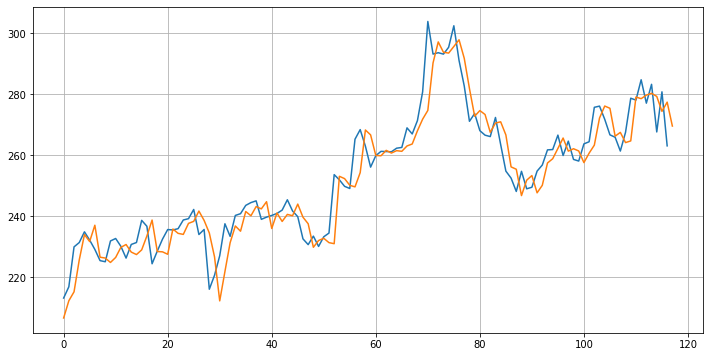

In [206]:
plt.figure(figsize=(12,6))

plt.plot(y_test[250:])
plt.plot(yhat[250:])
plt.grid()

In [199]:
len(y_test)

368